In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv('./dataset.csv')
X.head(10)

,Unnamed: 0,item_id,receipt_id,device_id,local_date,barcode,price,quantity,region
0,0,11660931229,7364786357,352402250963288,2021-02-02 00:00:01,46200310,133.0,1.0,Нижегородская область
1,1,11660931230,7364786357,352402250963288,2021-02-02 00:00:01,4601501425437,100.0,1.0,Нижегородская область
2,2,11660931245,7364786362,352403362581574,2021-02-02 00:00:04,NaN,50.0,1.0,Москва
3,3,11660931313,7364786391,352399468048288,2021-02-02 01:00:11,NaN,29.0,1.0,Ульяновская область
4,4,11660931336,7364786406,352401023174844,2021-02-02 00:00:17,NaN,250.0,1.0,Москва
5,5,11660931337,7364786406,352401023174844,2021-02-02 00:00:17,NaN,50.0,1.0,Москва
6,6,11660931403,7364786435,352400918986789,2021-02-02 02:00:21,NaN,120.0,1.0,Свердловская область
7,7,11660931522,7364786509,352400687215221,2021-02-02 00:00:38,NaN,50.0,7.0,Липецкая область
8,8,11660931602,7364786564,352406518857918,2021-02-02 00:00:48,NaN,125.0,1.0,Республика Коми
9,9,11660931773,7364786673,352403179996511,2021-02-02 00:01:03,4610017250037,87.0,2.0,Санкт-Петербург


<h1> EDA </h1>

<b> Percent of missing values in different categorials </b>

In [3]:
X.head(3)

,Unnamed: 0,item_id,receipt_id,device_id,local_date,barcode,price,quantity,region
0,0,11660931229,7364786357,352402250963288,2021-02-02 00:00:01,46200310,133.0,1.0,Нижегородская область
1,1,11660931230,7364786357,352402250963288,2021-02-02 00:00:01,4601501425437,100.0,1.0,Нижегородская область
2,2,11660931245,7364786362,352403362581574,2021-02-02 00:00:04,NaN,50.0,1.0,Москва


<AxesSubplot:>

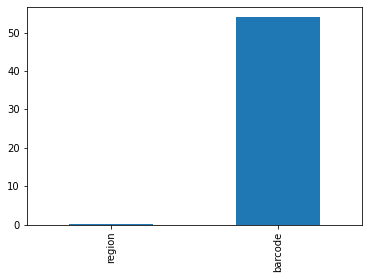

In [4]:
def drop_data(X):
    missing = X.isna().sum()
    missing = missing[missing>0]/X.shape[0]*100
    missing.sort_values(inplace=True)    
        
    return missing

missing = drop_data(X)
missing.plot.bar()

<b> Drop all rows with incorrect quantity values </b>

In [5]:
X[ (X['quantity'] <= 0) | (X['quantity'] % 1 != 0) ].head(5) 

,Unnamed: 0,item_id,receipt_id,device_id,local_date,barcode,price,quantity,region
46,46,11660932533,7364787139,352400866634268,2021-02-02 00:02:42,NaN,1600.0,0.150,Краснодарский край
47,47,11660932534,7364787139,352400866634268,2021-02-02 00:02:42,NaN,650.0,0.108,Краснодарский край
53,53,11660933011,7364787387,352400866634268,2021-02-02 00:03:33,NaN,290.0,0.104,Краснодарский край
54,54,11660933038,7364787410,352402132536876,2021-02-02 05:03:40,NaN,175.0,0.390,Иркутская область
61,61,11660933542,7364787741,352400866634268,2021-02-02 00:04:33,NaN,310.0,0.274,Краснодарский край


In [6]:
#Drop the rows where the region is missing
r_drop = X['region'].isna() #rows to drop
X.drop( r_drop.index[r_drop], axis=0, inplace=True )

#Drop rows with incorrect quantity
NonInt = (X['quantity'] <= 0) | (X['quantity'] % 1 != 0) #is non integer "quantity"
X.drop( NonInt.index[NonInt], axis=0, inplace=True  )

X['local_date'] = pd.to_datetime(X['local_date']) #Transform to datetime format

Sort by date and reset index

In [7]:
X.sort_values(by=['local_date'],inplace=True)
X.drop('Unnamed: 0',axis=1,inplace=True)
X.reset_index(drop=True,inplace=True)
X.head(4)

,item_id,receipt_id,device_id,local_date,barcode,price,quantity,region
0,11651314851,7359194219,352400319648496,2018-07-09 09:15:47,NaN,67.500000,1.0,Алтайский край
1,11651315784,7359194748,352400319648496,2018-07-09 09:16:52,NaN,151.000000,1.0,Алтайский край
2,11651316440,7359195116,352400319648496,2018-07-09 09:19:53,NaN,144.000000,1.0,Алтайский край
3,11651317525,7359195760,352400319648496,2018-07-09 09:22:33,NaN,49.700001,1.0,Алтайский край


<b> Search information in some variables <b>     

item_id, receipt_id, device_id, barcode, price

In [8]:
print( 'part of unique item_id: {:.2f}'.format(X['item_id'].value_counts().shape[0]/X['item_id'].shape[0])    )
print( 'part of unique receipt_id: {:.2f}'.format(X['receipt_id'].value_counts().shape[0]/X['item_id'].shape[0]) )
print( 'part of unique device_id: {:.2f}'.format(X['device_id'].value_counts().shape[0]/X['item_id'].shape[0]) )

part of unique item_id: 1.00
part of unique receipt_id: 0.60
part of unique device_id: 0.01


In [9]:
tmp = X.loc[~X['barcode'].isna()]['barcode']
print( 'part of unique barcode: {:.2f}'.format(tmp.value_counts().shape[0]/tmp.shape[0]) )

part of unique barcode: 0.15


In my opinion only device_id can have predictive power.

<b> Let's consider statistical characteristics of some features </b>

<AxesSubplot:ylabel='Count'>

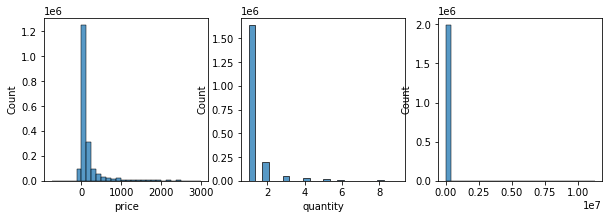

In [10]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(10,3))
sns.histplot(X[ X['price'] < 3000 ]['price'],ax=axes[0], bins=30)
sns.histplot(X[ X['quantity'] < 10 ]['quantity'],ax=axes[1])
sns.histplot(X['price']/X['quantity'],ax=axes[2],bins=30)

Looks like the price value is randomly generated and can't be using for prediction

In [11]:
print( (X['price']/X['quantity']).mean() )
print( (X['price']/X['quantity']).std()  )

403.3802482289022
12113.702301850037


In [12]:
print( X['quantity'].mean() )
print( X['quantity'].std()  )

2.3750407548375425
146.2167702849724


<h3> Encode datetame as separate columns. Add week_day </h3>

In [13]:
Xt = X[ X['region'] == 'Нижегородская область']
DF =    {'year'    :[0]*Xt.shape[0],
         'month'   :[0]*Xt.shape[0],
         'day'     :[0]*Xt.shape[0],
         'week_day':[0]*Xt.shape[0],
         'hour'    :[0]*Xt.shape[0],}
for i in range(0,Xt.shape[0]):
    date = Xt['local_date'].iloc[i]
    DF['year'][i]     = np.int16(date.year)
    DF['month'][i]    = np.int8(date.month)
    DF['day'][i]      = np.int8(date.day)
    DF['week_day'][i] = np.int8(date.weekday())
    DF['hour'][i]     = np.int8(date.hour)

Check: are datetime correct? In general it's correct 

In [14]:
DFd = pd.DataFrame(DF)

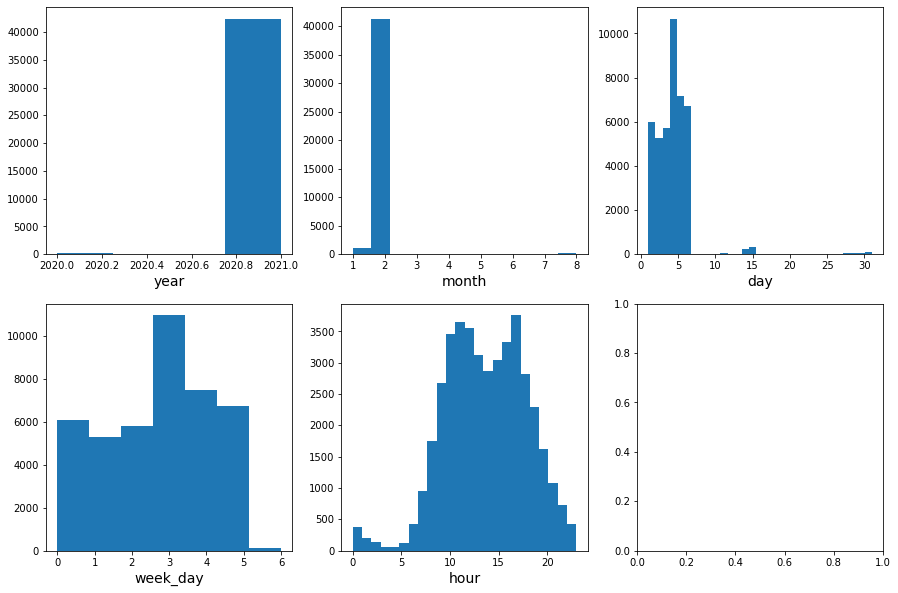

In [15]:
fig, ax = plt.subplots( nrows=2,ncols=3, figsize=(15,10) )
ax = ax.flatten()
bins = [4,12,31,7,24]
for i,feature in enumerate(DFd.columns):
    ax[i].hist(DFd[feature],bins=bins[i])
    ax[i].set_xlabel(feature,fontsize=14)

In [16]:
#93% of the rows are relate to the last month represented in the data
DFd[ (DFd['year']==2021) & (DFd['month']==2) ].shape[0]/DFd.shape[0]

0.9717007762879323

<h2> Prepair simple dataset for prediction </h2>

In [17]:
sX = DFd.join( Xt['quantity'].reset_index(drop=True)  )

In [18]:
sX.loc[ (sX['year'] == 2018) 
       & (sX['month'] == 7) & (sX['day'] == 9) 
       & (sX['hour'] == 9)  ]['quantity'].sum()

0.0

In [19]:
sX

,year,month,day,week_day,hour,quantity
0,2020,8,3,0,9,1.0
1,2020,8,3,0,9,1.0
2,2020,8,3,0,9,1.0
3,2020,8,3,0,10,1.0
4,2020,8,3,0,11,1.0
...,...,...,...,...,...,...
42505,2021,2,6,5,23,1.0
42506,2021,2,6,5,23,2.0
42507,2021,2,6,5,23,1.0
42508,2021,2,6,5,23,2.0


In [20]:
Df2 = {'year' :[],
       'month':[],
       'day'  :[],
       'hour' :[],
       'week_day':[],
       'quantity':[]
       }
a  = sX['hour'].iloc[0]
sa = 0
is_write = True
for i in range(sX.shape[0]):
    
    if is_write:        
        Df2['year'].append(sX['year'].iloc[i])
        Df2['month'].append(sX['month'].iloc[i])
        Df2['day'].append(sX['day'].iloc[i])
        Df2['hour'].append(sX['hour'].iloc[i])
        Df2['week_day'].append(sX['week_day'].iloc[i])
        is_write = False
                             
    if sX['hour'].iloc[i] != a:
        Df2['quantity'].append(sa)
        sa = 0
        a  = sX['hour'].iloc[i]        
        is_write = True
    
    sa += sX['quantity'].iloc[0]
Df2['quantity'].append(sa)

In [21]:
X2 = pd.DataFrame(Df2)

In [22]:
X2.iloc[0:7]

,year,month,day,hour,week_day,quantity
0,2020,8,3,9,0,3.0
1,2020,8,3,11,0,1.0
2,2020,8,3,12,0,1.0
3,2020,8,3,12,0,3.0
4,2020,8,3,14,0,3.0
5,2020,8,3,15,0,2.0
6,2020,8,3,16,0,2.0


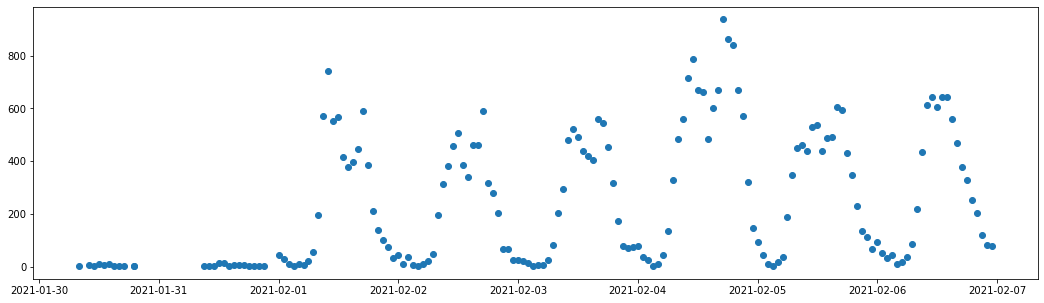

In [23]:
indx = (pd.to_datetime( X2.iloc[:,:-2] ) >= '2021-1-30').sum()
plt.figure(figsize=(18,5))
plt.scatter(pd.to_datetime( X2.iloc[-indx:,:-2] ),X2.iloc[-indx:]['quantity'])

As we can see, datetime dependences manifests itself after February 1st. Now let's try to predict the values.

In [24]:
indx = (pd.to_datetime( X2.iloc[:,:-2] ) >= '2021-02-01').sum()
X2.drop(range(X2.shape[0]-indx),axis=0,inplace=True)
X2.head(3)

,year,month,day,hour,week_day,quantity
223,2021,2,1,0,0,43.0
224,2021,2,1,1,0,31.0
225,2021,2,1,2,0,12.0


In [25]:
def DataPrep(X,day_lag=1,test_size=.15):
    
    test_index = X.shape[0] - int(X.shape[0]*test_size)
    
    Xtrain = X.iloc[:test_index,:-1]
    ytrain = X.iloc[:test_index, -1]
    Xtest  = X.iloc[test_index:,:-1]
    ytest  = X.iloc[test_index:, -1]
        
    return Xtrain, Xtest, ytrain, ytest


Xtrain, Xtest, ytrain, ytest = DataPrep(X2,test_size=.15)


In [26]:
X2.head()

,year,month,day,hour,week_day,quantity
223,2021,2,1,0,0,43.0
224,2021,2,1,1,0,31.0
225,2021,2,1,2,0,12.0
226,2021,2,1,3,0,3.0
227,2021,2,1,4,0,12.0


In [27]:
import xgboost as xgb
regB = xgb.XGBRegressor()

regB.fit(Xtrain,ytrain)
pr = regB.predict(Xtrain)

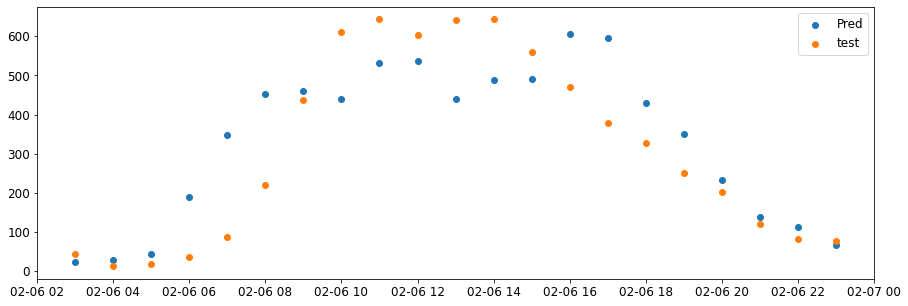

In [28]:
plt.figure(figsize=(15,5))
plt.rc('font',size=12)
plt.scatter(pd.to_datetime( Xtest.iloc[:,:-1] ),regB.predict(Xtest), label='Pred' )
plt.scatter(pd.to_datetime( Xtest.iloc[:,:-1] ),ytest, label='test')
plt.legend(loc='upper right')

In [29]:
print( regB.feature_importances_ )

[0.         0.         0.16422299 0.83577704 0.        ]


<h2> Make prediction to new day </h2>

In [36]:
ND = pd.DataFrame( { 'year' :[2021]*24,
       'month':[2]*24,
       'day'  :[X2.iloc[-1]['day']+1]*24,
       'hour' :np.arange(0,24),
       'week_day':[X2.iloc[-1]['week_day']+1]*24})

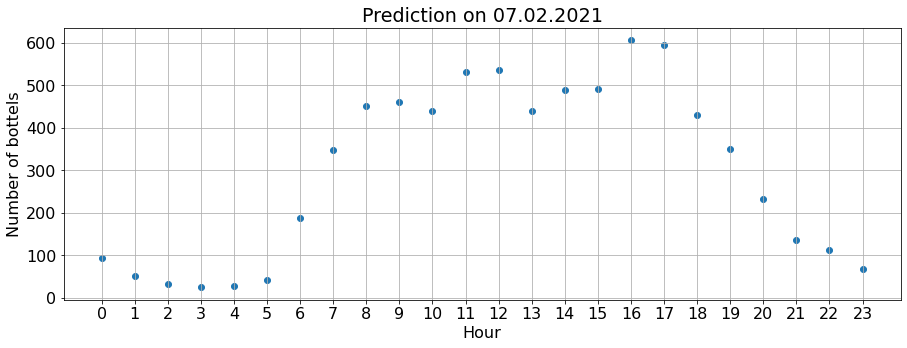

In [37]:
prediction = regB.predict(ND)
plt.figure(figsize=(15,5))
plt.rc('font',size=16)
plt.scatter(pd.to_datetime( ND.iloc[:,:-1] ),prediction)
plt.xticks(pd.to_datetime( ND.iloc[:,:-1] ),np.arange(0,24));
plt.ylabel('Number of bottels')
plt.xlabel('Hour')
plt.title('Prediction on 07.02.2021')
plt.grid(True)